## Linear Regression
y = mx + b

## multiple linear Regression(다중 선형 회귀)

y = b + m1x1 + m2x2 + ...

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#SGD : Stochastic Gradient descent

In [4]:
dataset = pd.read_csv('MultipleLinearRegressionData.csv')
dataset



,hour,absent,place,score
0,0.5,3,Home,10
1,1.2,4,Library,8
2,1.8,2,Cafe,14
3,2.4,0,Cafe,26
4,2.6,2,Home,22
5,3.2,0,Home,30
6,3.9,0,Library,42
7,4.4,0,Library,48
8,4.5,5,Home,38
9,5.0,1,Cafe,58


dataset 안에서 공부장소가 범주형<br>
--> 원핫인코딩 해야해
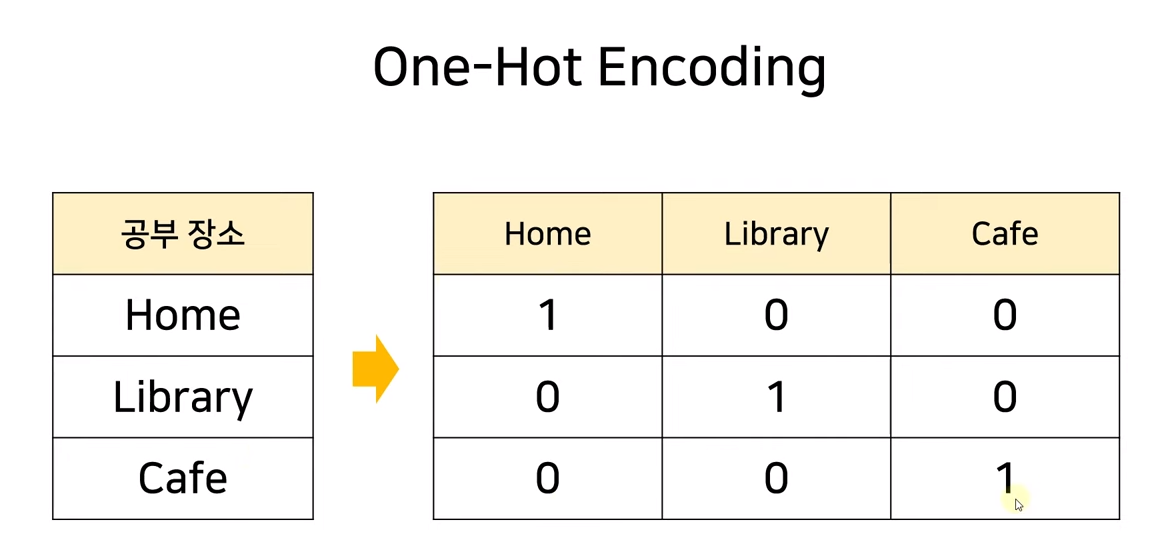


### 다중 공선성
독립 변수들 간에 서로 강한 상관관계를 가지면서 회귀계수 추정의 오류가 나타나는 문제 <br>
--> 하나의 피처가 다른 피처에 영향을 미침<br>
--> 독립적이여야 하는데 그렇지 못하게 됨.

### Dummy variable trap
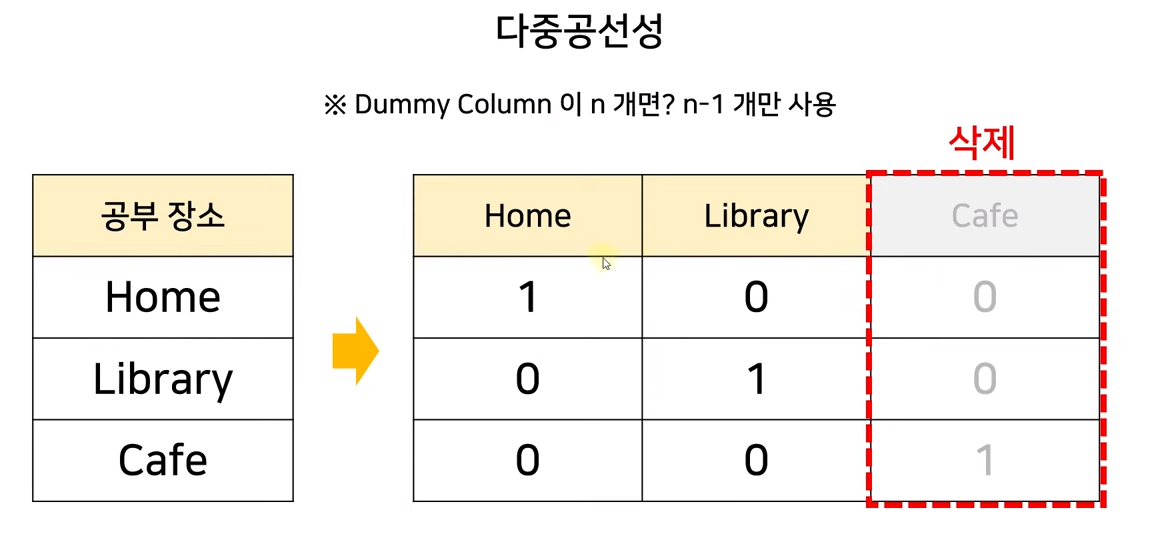
컬럼 하나 제외 (cafe를 없애도 구분 가능) <br>
서로 상관관계를 없앨수 있어

In [6]:
#독립변수
X = dataset.iloc[:,:-1].values # row는 전부, column은 마지막꺼 하나빼고 다
#종속변수
y = dataset.iloc[:,-1].values # row는 전부, column은 마지막꺼 하나만

X

array([[0.5, 3, 'Home'],
       [1.2, 4, 'Library'],
       [1.8, 2, 'Cafe'],
       [2.4, 0, 'Cafe'],
       [2.6, 2, 'Home'],
       [3.2, 0, 'Home'],
       [3.9, 0, 'Library'],
       [4.4, 0, 'Library'],
       [4.5, 5, 'Home'],
       [5.0, 1, 'Cafe'],
       [5.3, 2, 'Cafe'],
       [5.8, 0, 'Cafe'],
       [6.0, 3, 'Library'],
       [6.1, 1, 'Cafe'],
       [6.2, 1, 'Library'],
       [6.9, 4, 'Home'],
       [7.2, 2, 'Cafe'],
       [8.4, 1, 'Home'],
       [8.6, 1, 'Library'],
       [10.0, 0, 'Library']], dtype=object)

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'),[2])], remainder='passthrough')
# transformers(어떤 변경을 가할지,OneHotEncoder(drop='first')--> 첫번째 칼럼 드럽,[2]-->2번 칼럼에 적용, remainder='passthrough' --> 나머지 그냥 둔다)
X= ct.fit_transform(X)
X
# 1 0 : HOME
# 0 1 : Library
# 0 0 : Cafe

array([[1.0, 0.0, 0.5, 3],
       [0.0, 1.0, 1.2, 4],
       [0.0, 0.0, 1.8, 2],
       [0.0, 0.0, 2.4, 0],
       [1.0, 0.0, 2.6, 2],
       [1.0, 0.0, 3.2, 0],
       [0.0, 1.0, 3.9, 0],
       [0.0, 1.0, 4.4, 0],
       [1.0, 0.0, 4.5, 5],
       [0.0, 0.0, 5.0, 1],
       [0.0, 0.0, 5.3, 2],
       [0.0, 0.0, 5.8, 0],
       [0.0, 1.0, 6.0, 3],
       [0.0, 0.0, 6.1, 1],
       [0.0, 1.0, 6.2, 1],
       [1.0, 0.0, 6.9, 4],
       [0.0, 0.0, 7.2, 2],
       [1.0, 0.0, 8.4, 1],
       [0.0, 1.0, 8.6, 1],
       [0.0, 1.0, 10.0, 0]], dtype=object)

### 데이터 셋 분리

In [8]:
from sklearn.model_selection import train_test_split
# 4개 값 출력
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
#testset를 20퍼센트, random_state -> seed 

### 학습 (다중선형회귀)

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

### 예측값과 실제값 비교(테스트 셋)

In [11]:
y_pred = reg.predict(X_test)
y_pred

array([ 92.15457859,  10.23753043, 108.36245302,  38.14675204])

In [12]:
y_test

array([ 90,   8, 100,  38], dtype=int64)

In [13]:
reg.coef_

array([-5.82712824, -1.04450647, 10.40419528, -1.64200104])

In [14]:
reg.intercept_

5.365006706544783

### 모델 평가

In [16]:
reg.score(X_train,y_train)

0.9623352565265527

In [17]:
reg.score(X_test, y_test)

0.9859956178877447